In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


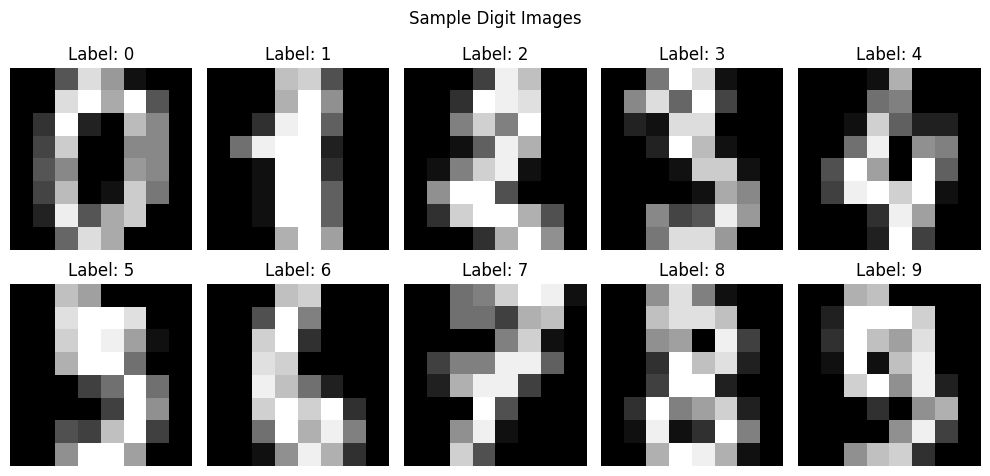

In [4]:
digits = load_digits()
X = digits.data
y = digits.target

# Visualize some digit images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, image, label in zip(axes.ravel(), digits.images, y):
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')
plt.suptitle("Sample Digit Images")
plt.tight_layout()
plt.show()


In [5]:
df = pd.DataFrame(X)
df['target'] = y

# Show first few rows
print("First 5 Rows of the Dataset:")
print(df.head())


First 5 Rows of the Dataset:
     0    1    2     3     4     5    6    7    8    9  ...   55   56   57  \
0  0.0  0.0  5.0  13.0   9.0   1.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  12.0  13.0   5.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0   4.0  15.0  12.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  7.0  15.0  13.0   1.0  0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0   1.0  11.0   0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

    58    59    60    61   62   63  target  
0  6.0  13.0  10.0   0.0  0.0  0.0       0  
1  0.0  11.0  16.0  10.0  0.0  0.0       1  
2  0.0   3.0  11.0  16.0  9.0  0.0       2  
3  7.0  13.0  13.0   9.0  0.0  0.0       3  
4  0.0   2.0  16.0   4.0  0.0  0.0       4  

[5 rows x 65 columns]


In [6]:
summary = df.describe().T
print("Descriptive Statistics:")
print(summary)


Descriptive Statistics:
         count       mean       std  min   25%   50%   75%   max
0       1797.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0
1       1797.0   0.303840  0.907192  0.0   0.0   0.0   0.0   8.0
2       1797.0   5.204786  4.754826  0.0   1.0   4.0   9.0  16.0
3       1797.0  11.835838  4.248842  0.0  10.0  13.0  15.0  16.0
4       1797.0  11.848080  4.287388  0.0  10.0  13.0  15.0  16.0
...        ...        ...       ...  ...   ...   ...   ...   ...
60      1797.0  11.809126  4.933947  0.0  10.0  14.0  16.0  16.0
61      1797.0   6.764051  5.900623  0.0   0.0   6.0  12.0  16.0
62      1797.0   2.067891  4.090548  0.0   0.0   0.0   2.0  16.0
63      1797.0   0.364496  1.860122  0.0   0.0   0.0   0.0  16.0
target  1797.0   4.490818  2.865304  0.0   2.0   4.0   7.0   9.0

[65 rows x 8 columns]


Missing Values in Each Column:
Series([], dtype: int64)


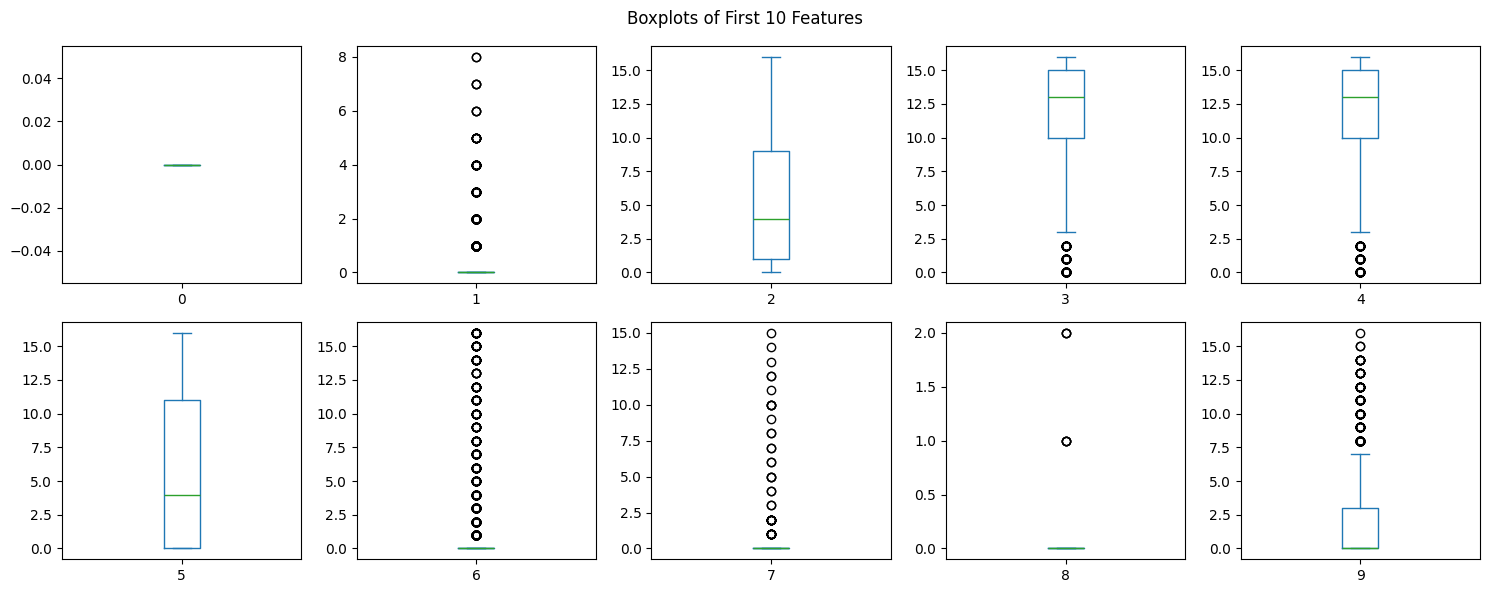

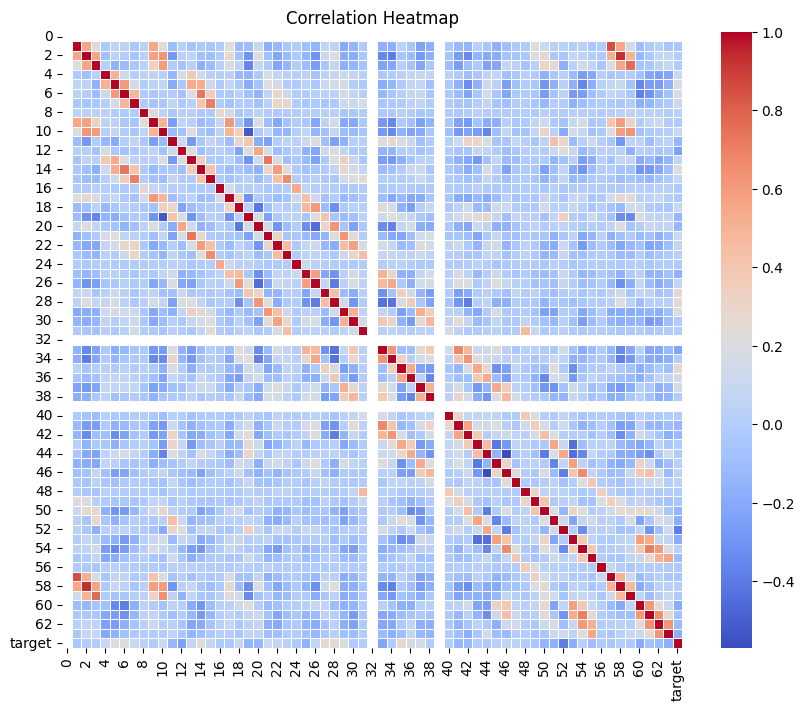

In [9]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

# Outliers using boxplots for first 10 features
df.iloc[:, :10].plot(kind='box', subplots=True, layout=(2, 5), figsize=(15, 6), sharey=False)
plt.suptitle("Boxplots of First 10 Features")
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [10]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

pipelines = {
    name: Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=30)),
        ('classifier', model)
    ])
    for name, model in models.items()
}


In [12]:
results = []

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1 Score": f1_score(y_test, y_pred, average='macro')
    })

results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
print("Evaluation Metrics for All Models:")
print(results_df)


Evaluation Metrics for All Models:
                 Model  Accuracy  Precision    Recall  F1 Score
2                  SVM  0.980556   0.982898  0.981529  0.982132
3                  KNN  0.972222   0.971150  0.972754  0.971591
0  Logistic Regression  0.961111   0.961067  0.960549  0.960722
1        Random Forest  0.958333   0.960057  0.959725  0.959591
4    Gradient Boosting  0.925000   0.928307  0.927969  0.927457


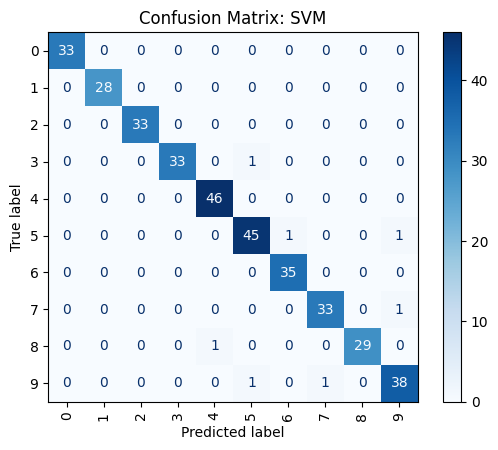

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.96      0.96      0.96        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



In [14]:
best_model_name = results_df.iloc[0]['Model']
best_pipeline = pipelines[best_model_name]
y_pred_best = best_pipeline.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title(f"Confusion Matrix: {best_model_name}")
plt.show()
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best, target_names=digits.target_names.astype(str)))



In [15]:
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 10, 20]
}

rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=30)),
    ('classifier', RandomForestClassifier(random_state=42))
])

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters from GridSearch:")
print(grid_search.best_params_)


Best Parameters from GridSearch:
{'classifier__max_depth': None, 'classifier__n_estimators': 150}


Final Metrics for Tuned Random Forest:
   Accuracy  Precision    Recall  F1 Score
0  0.963889   0.966802  0.965945  0.966156


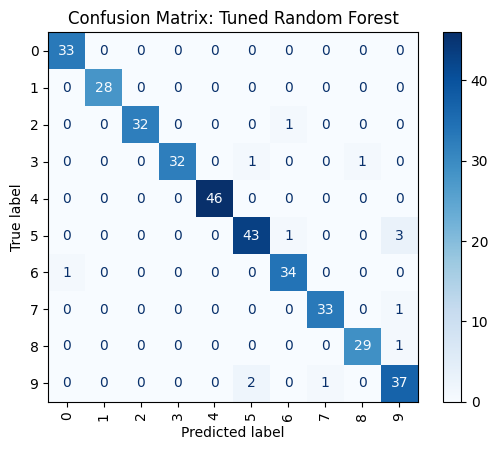

In [17]:
best_rf = grid_search.best_estimator_
y_rf_pred = best_rf.predict(X_test)

final_metrics = {
    "Accuracy": accuracy_score(y_test, y_rf_pred),
    "Precision": precision_score(y_test, y_rf_pred, average='macro'),
    "Recall": recall_score(y_test, y_rf_pred, average='macro'),
    "F1 Score": f1_score(y_test, y_rf_pred, average='macro')
}

final_df = pd.DataFrame([final_metrics])
print("Final Metrics for Tuned Random Forest:")
print(final_df)
cm_rf = confusion_matrix(y_test, y_rf_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=digits.target_names)
disp_rf.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix: Tuned Random Forest")
plt.show()